<img src="udlap.jpg" width="300" />

# Classical Machine Learning example

The purpose of this example is to demonstrate the steps associated to a supervised learning approach applied to a classification task.

Example main features:

1. All the code was implemented in Python 2.7 https://www.python.org/
2. The dataset used is an excerpt of the Sina Weibo website (https://weibo.com/login.php) from September 2014 to May 2015 which contain several features related to social media interactions among platform users.
3. The  Python packages required to run the programs are the following:
    * Jupyter notebook (Python interactive prompt) http://jupyter.org/index.html
    * Numpy (classification) http://www.numpy.org/
	* Scikit-learn (Classification) http://scikit-learn.org/stable/
	* Pandas (Data analysis) https://pandas.pydata.org/
    * Matplotlib (visualization) https://matplotlib.org/

    
## Exploratory data analysis

The first task to perform is to analyze the different features available in the dataset in order to understand the nature of information.The following steps show how to achieve it:

1. Load the whole Sina Weibo dataset.


In [1]:
#Import Pandas package which help us to work with a structured dataset easily
import pandas as pd
#For displaying a Pandas table in the jupyter notebook
from IPython.display import display, Markdown
#Load the dataset (Microsoft Excel file) as a Pandas table (called also dataframe)
data = pd.read_excel("2015_weibodata.xlsx", sheet_name=None)
#Show the first five rows of the table
data.head(5)


,`year`,`month`,`day`,`hour`,`minute`,`lon`,`lat`,`user_id`,`gender`,`province`,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2014,9,1,15,52,121.57677,31.335880,2203784962,'f','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,9,1,16,47,121.54950,31.366600,1006306595,'m','100',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,9,1,17,7,121.56900,31.349600,2027776417,'m','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,9,1,19,52,121.56594,31.346882,3948063033,'m','100',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,9,1,21,44,121.57879,31.341780,2275605075,'f','31',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



2\. Obtain some relevant statistics associated to the dataset.


In [2]:
#Get some basic information from the table
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174967 entries, 0 to 174966
Data columns (total 31 columns):
 `year`               174967 non-null int64
 `month`              174967 non-null int64
 `day`                174967 non-null int64
 `hour`               174967 non-null int64
 `minute`             174967 non-null int64
 `lon`                174967 non-null float64
 `lat`                174967 non-null float64
 `user_id`            174967 non-null int64
 `gender`             174967 non-null object
 `province`           174967 non-null object
 `city`               174967 non-null object
 `statuses_count`     174967 non-null int64
 `followers_count`    174967 non-null int64
 `friends_count`      174967 non-null int64
 `reposts_count`      174967 non-null int64
 `comments_count`     174967 non-null int64
 `text`               174967 non-null object
Unnamed: 17           2416 non-null object
Unnamed: 18           808 non-null object
Unnamed: 19           509 non-null object
Unname

3\. Considering the dataset size (174967 rows), the average computer capabilities of users and the execution time that could take the experiment a random row subset is selected. 

In [3]:
#Obtain a random row subset of size n from the original table 
data=data.sample(n=27000)
#Reset table subset indices (start from 0 to n-1) otherwise the table keeps original ones
data = data.reset_index(drop=True)

4\. Eliminate unnecessary columns from the table (Unnamed columns discovered in the statistics).

In [4]:
#Eliminate columns that don't have any meaningful information
cleanData = data[data.columns[:-14]]
#Show again the information about the table
cleanData.info()
#Obtain the first five rows without unnecessary columns
cleanData.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 17 columns):
 `year`               27000 non-null int64
 `month`              27000 non-null int64
 `day`                27000 non-null int64
 `hour`               27000 non-null int64
 `minute`             27000 non-null int64
 `lon`                27000 non-null float64
 `lat`                27000 non-null float64
 `user_id`            27000 non-null int64
 `gender`             27000 non-null object
 `province`           27000 non-null object
 `city`               27000 non-null object
 `statuses_count`     27000 non-null int64
 `followers_count`    27000 non-null int64
 `friends_count`      27000 non-null int64
 `reposts_count`      27000 non-null int64
 `comments_count`     27000 non-null int64
 `text`               27000 non-null object
dtypes: float64(2), int64(11), object(4)
memory usage: 3.7+ MB


,`year`,`month`,`day`,`hour`,`minute`,`lon`,`lat`,`user_id`,`gender`,`province`,`city`,`statuses_count`,`followers_count`,`friends_count`,`reposts_count`,`comments_count`,`text`
0,2015,1,22,18,14,121.552290,31.313390,5112706961,'m','11','1000',37,13,98,0,0,'来看看我拍的视频：“看我走得多好，玩的不亦乐乎????????☺☺#60秒美拍#”，点此...
1,2015,4,26,23,29,121.533409,31.156715,1847260744,'m','34','15',3661,1167,144,1,0,'坚持自己的判断不后悔 http://t.cn/RAQmuhr');
2,2015,5,4,19,15,121.620000,31.205100,3952415292,'m','31','15',10971,709,2013,0,0,'《湖北新闻》湖北省最美基层干部：袁少敏。[围观][赞] http://t.cn/RAly...
3,2015,2,7,9,32,121.504166,31.298536,1316495962,'f','81','1000',1667,877,620,0,7,'体检项目比其他公司多了一半……被体检医生感慨公司福利真好。终于做了一次“别人家的公司” ...
4,2015,3,8,2,27,121.489677,31.231270,2331300967,'f','51','1',313,136,191,0,0,'他若爱你，在你需要的时候，他就会出现在你身边。—而我什么时候才能遇到这么一个陪伴我的人。...


5\. Transform potential classification features like __province__ and __city__ to integers taking into account their numerical nature. In the case of the __text__ column it is much harder to transform it to an integer value without applying some sort of Natural language processing technique (Bag of words model for instance, https://en.wikipedia.org/wiki/Bag-of-words_model).

In [5]:
%%capture
#Jupyter notebook command that disables the Python output for this code box
#Transform province and city columns from string to integer 
cleanData[' `province`']=cleanData[' `province`'].str[2:-1].apply(int)
cleanData[' `city`']=cleanData[' `city`'].str[2:-1].apply(int)

In [6]:
#Obtain the first five rows of the table
cleanData.head(5)

,`year`,`month`,`day`,`hour`,`minute`,`lon`,`lat`,`user_id`,`gender`,`province`,`city`,`statuses_count`,`followers_count`,`friends_count`,`reposts_count`,`comments_count`,`text`
0,2015,1,22,18,14,121.552290,31.313390,5112706961,'m',11,1000,37,13,98,0,0,'来看看我拍的视频：“看我走得多好，玩的不亦乐乎????????☺☺#60秒美拍#”，点此...
1,2015,4,26,23,29,121.533409,31.156715,1847260744,'m',34,15,3661,1167,144,1,0,'坚持自己的判断不后悔 http://t.cn/RAQmuhr');
2,2015,5,4,19,15,121.620000,31.205100,3952415292,'m',31,15,10971,709,2013,0,0,'《湖北新闻》湖北省最美基层干部：袁少敏。[围观][赞] http://t.cn/RAly...
3,2015,2,7,9,32,121.504166,31.298536,1316495962,'f',81,1000,1667,877,620,0,7,'体检项目比其他公司多了一半……被体检医生感慨公司福利真好。终于做了一次“别人家的公司” ...
4,2015,3,8,2,27,121.489677,31.231270,2331300967,'f',51,1,313,136,191,0,0,'他若爱你，在你需要的时候，他就会出现在你身边。—而我什么时候才能遇到这么一个陪伴我的人。...


6\. From the above table, it can be noticed that now the majority of columns are numerical except from the __text__ column, so any of these attributes can be used for a supervised learning apporach. Now let's analyze the columns that could have a categorical nature (repetitive values) and can be used as target labels in a classification approach.

In [7]:
#Get a column header list
columNames=list(cleanData.columns.values)
#For each column (except the text column) obtain the different values and the number of rows associated
for names in columNames[:-1]:
    print "-----------------------------"
    print cleanData[names].value_counts()
    print "-----------------------------"

-----------------------------
2015    22101
2014     4899
Name:  `year`, dtype: int64
-----------------------------
-----------------------------
1     7807
5     5930
4     3967
2     3371
12    2224
11    1509
3     1026
10     723
9      443
Name:  `month`, dtype: int64
-----------------------------
-----------------------------
18    1239
27    1117
26    1062
8     1058
25    1040
16    1039
17    1038
28    1011
24     996
13     968
7      967
14     962
15     927
1      921
12     914
10     904
3      866
19     853
6      852
5      852
9      846
11     789
4      787
23     784
2      750
22     670
20     607
30     592
21     585
29     565
31     439
Name:  `day`, dtype: int64
-----------------------------
-----------------------------
22    2294
21    2064
23    2036
20    1977
19    1689
18    1571
17    1372
0     1331
16    1223
12    1186
10    1139
15    1108
13    1104
14    1081
9     1070
11    1063
8      961
7      708
1      656
6      392
2      342
5      

7\. From all the columns analyzed, the __gender attribute__ can be used as a suitable option for a __classification task__, where the idea would be to determine if certain interaction was performed by a woman or a man considering the other columns values.



In [8]:
#Show the number of rows associated to each gender
print cleanData[' `gender`'].value_counts()

 'f'    16903
 'm'    10097
Name:  `gender`, dtype: int64


8\. To see more clearly the gender importance, let's plot a pie-chart according to the number of rows related to each class.

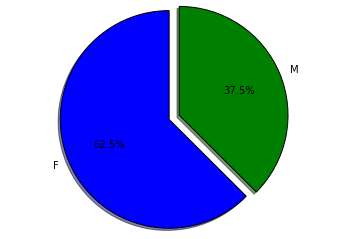

In [9]:
#Command used to see the plot inside the Jupyter notebook
#https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
%matplotlib inline
import matplotlib.pyplot as plt
#Labels associated to each gender
labels = 'F', 'M'
#Number of rows related to each gender
sizes = [109416, 65551]
explode = (0, 0.1)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
#Plot the figure
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Show the figure
plt.show()

9\. For the rest of colums, we can confirm the relative importance of each of them (in a classification process) by ploting a histogram that display the number of intances (vertical axis) that have a given value (horizontal axis).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011777470>,
      dtype=object)

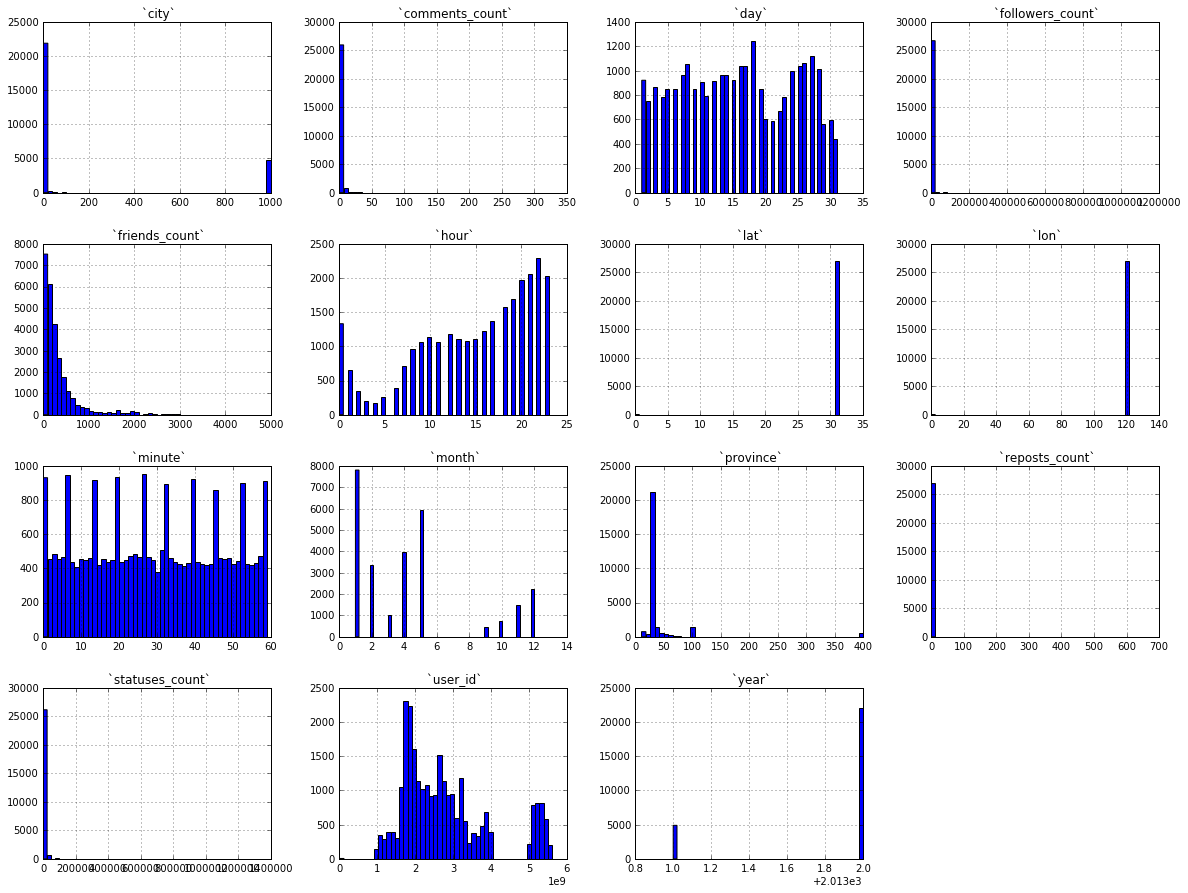

In [10]:
#Command used to see the plot inside the Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
#Plot a histogram for each table column
cleanData.hist(bins=50,figsize=(20,15))

From histograms created, it can be observed that all attributes have certain variability depending of the type and value of columns which could help a classifier to determine the gender. Additionally, the histograms highlights the  vast number of instances associated to the dataset and confirms the importance of this attributes for the creation of a supervised learning classifier.   

##  Feature dataset creation

1. After analysing the table attributes, the next step is to create a subset of the columns that are going to be used in a classification process.

In [11]:
#According to the attributes nature and type, select the most representative ones as features for a classification process
FeatureCols=[' `year`', ' `month`', ' `day`', ' `hour`', ' `minute`',' `province`', ' `city`', 
             ' `statuses_count`', ' `followers_count`', ' `friends_count`', ' `reposts_count`',
             ' `comments_count`']

#Subset the features into a new table
featuresDataset = cleanData.loc[:, FeatureCols]
#Show the first five feature rows 
featuresDataset.head(5)
                          

,`year`,`month`,`day`,`hour`,`minute`,`province`,`city`,`statuses_count`,`followers_count`,`friends_count`,`reposts_count`,`comments_count`
0,2015,1,22,18,14,11,1000,37,13,98,0,0
1,2015,4,26,23,29,34,15,3661,1167,144,1,0
2,2015,5,4,19,15,31,15,10971,709,2013,0,0
3,2015,2,7,9,32,81,1000,1667,877,620,0,7
4,2015,3,8,2,27,51,1,313,136,191,0,0


In [12]:
#Select the classification attribute (what we want to predict from the features)             
labelCol=' `gender`'
#Subset for each feature their respective label
#Transform the lable to a string variable
labelsDataset= cleanData.loc[:,labelCol].str[2:-1].apply(str) 
#Save the label as small as possible in memory
labelsDataset.astype('|S')
#Show the first five label rows 
labelsDataset.head(5)

0    m
1    m
2    m
3    f
4    f
Name:  `gender`, dtype: object

2\. Slice the feature dataset as well as the labels dataset into multiple training and test subsets in order to try different classification variations according to the K-fold cross validation technique (https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

<img src="kfold.jpg" alt="Drawing" style="width: 600px;"/>

In [13]:
#Import Kfold function from the scikit-learn  which is Machine learning package for Python
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# Define the split - into five folds using a random parameter to get different partitions
kf = KFold(n_splits=5,shuffle=True)
# Returns the number of splitting iterations in the cross-validation process
kf.get_n_splits(featuresDataset)
#Print the object to ensure that everything works fine
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


## Classification process

1. The next step is to create a classification model for each fold provided considering training and test partitions. 

<img src="supervisedLearning.jpg" alt="Drawing" style="width: 700px;"/>

2\. Obtain the different subsets related to each fold created.

In [14]:
#Import Kfold function from the scikit-learn which is Machine learning package for Python
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
num=1
for train_indices, test_indices in kf.split(featuresDataset):
    #Print the first ten indices associated to the features
    print("Fold "+str(num)+"---> Train: %s | test: %s" % (train_indices[:10], test_indices[:10]))
    num+=1

Fold 1---> Train: [ 0  2  3  5  6  8  9 12 13 14] | test: [ 1  4  7 10 11 16 22 23 24 38]
Fold 2---> Train: [ 0  1  3  4  5  7  9 10 11 12] | test: [ 2  6  8 13 14 25 30 39 49 55]
Fold 3---> Train: [0 1 2 3 4 5 6 7 8 9] | test: [12 27 28 33 35 41 44 47 51 52]
Fold 4---> Train: [ 0  1  2  4  6  7  8 10 11 12] | test: [ 3  5  9 15 17 18 19 26 29 31]
Fold 5---> Train: [ 1  2  3  4  5  6  7  8  9 10] | test: [ 0 20 21 32 34 40 42 48 56 63]


3\. Use different classifiers to predict the gender taking into account the state of the art available tools.

In [15]:
#Import a Support Vector Machine (SVM) classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
from sklearn.svm import LinearSVC
clf1= svm.LinearSVC()
#Show classifier attributes
print clf1

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [16]:
#Import a logistic regression classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn import linear_model
clf2 = linear_model.LogisticRegression(C=1e5)
#Show classifier attributes
print clf2


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [17]:
#Import a Multinomial Naive Bayes classifier from the scikit-learn package
#http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB()
#Show classifier attributes
print clf3

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


4\. Fit each classifier using the folds provided (training and test partitions) and calculate the mean accuracy associated.

In [18]:
#Import the mathematical package used for python to obtain the average accuracy of the results provided for each fold
import numpy as np
from sklearn.metrics import classification_report
#Append the classifiers into a Python list for evaluation each of them
classifiers=[clf1,clf2,clf3]
#Append the classifiers name for showing the results
classifierType=["Support Vector Machine","logistic regression","Multinomial Naive Bayes"]
#Apply each classifier and obtain the accuracy of each fold
for classifier,name in zip(classifiers,classifierType):
    num=1
    results=[]
    print "Classifier name: "+name
    for train, test in kf.split(featuresDataset):
        #http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
        #The fit function take as parameters the features and labels samples generated for each training fold
        result=classifier.fit(featuresDataset.ix[train], 
                      #The score function take as parameters the features and labels samples generated for each test fold
                      labelsDataset.ix[train]).score(featuresDataset.ix[test],
                                                 labelsDataset.ix[test])
        print  "Fold: "+str(num)+" accuracy: "+str(result)
        results.append(result)
        num+=1
    #Obtain the average acuraccy of each classifier    
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html    
    print "Average accuracy: "+str(np.average(results))    

Classifier name: Support Vector Machine
Fold: 1 accuracy: 0.6068518518518519
Fold: 2 accuracy: 0.6259259259259259
Fold: 3 accuracy: 0.6248148148148148
Fold: 4 accuracy: 0.38037037037037036
Fold: 5 accuracy: 0.5692592592592592
Average accuracy: 0.5614444444444444
Classifier name: logistic regression
Fold: 1 accuracy: 0.6335185185185185
Fold: 2 accuracy: 0.6468518518518519
Fold: 3 accuracy: 0.6461111111111111
Fold: 4 accuracy: 0.6325925925925926
Fold: 5 accuracy: 0.6374074074074074
Average accuracy: 0.6392962962962963
Classifier name: Multinomial Naive Bayes
Fold: 1 accuracy: 0.6362962962962962
Fold: 2 accuracy: 0.6305555555555555
Fold: 3 accuracy: 0.622037037037037
Fold: 4 accuracy: 0.6301851851851852
Fold: 5 accuracy: 0.6098148148148148
Average accuracy: 0.6257777777777778


## Conclusions

- What we seen so far:

   1. Load and inspect an specific dataset.
   2. Clean and preprocess the information associated to the dataset.
   3. Creation of a feature set tailored for a supervised learning task.
   4. Use of a splitting technique (K-fold) to test a classification model using different dataset samples.
   5. Use of distinct classification algorithms to test a classification model.
   6. Creation and evaluation of a classification model using different dataset samples.


- Obtained results highlight the following findings:

   1. The Logistic regression classifier obtains the highest accuracy according to the features provided.This classifier is follow by the Multinomial Naive Bayes and the Support Vector Machine.
   2. For the case of the Support Vector Machine, it can be observed that this type of classifier needs  more correlated features  between each other to generate better results.
   3. In the case of this example where every feature is independent, Multinomial Naive Bayes works also relatively well considering the use of the conditional probability in the algorithm.
   4. Logistic regression is intrinsically simpler than the other algorithms and it has low variance, so is less prone to over-fitting. Additionally, the state of the art has shown that in this kind of algorithm, features do not need to be correlated.